<p style="font-size: 30px; line-height: 135%;}">
<b>Small Circle inside Large Circle</b>
</p>

In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta a</b>
</p>

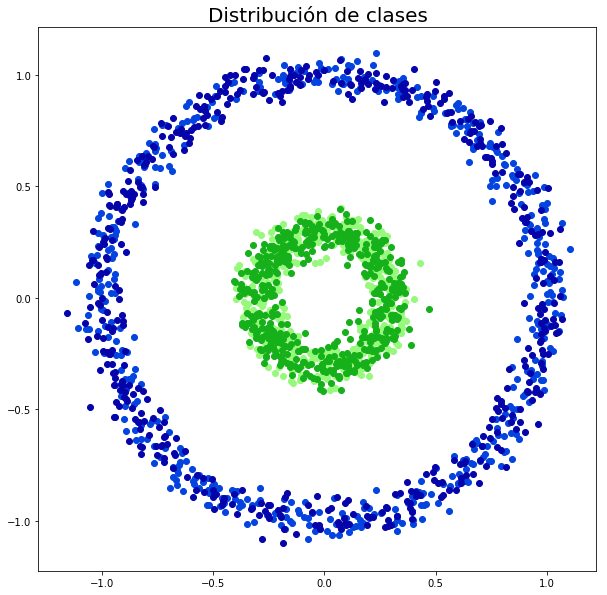

In [3]:
x_train, y_train, x_test, y_test = do_circles()

mske = y_train.astype(np.bool)
clase0e = x_train[~mske]
clase1e = x_train[mske]
x0e, y0e = clase0e.T
x1e, y1e = clase1e.T

mskp = y_test.astype(np.bool)
clase0p = x_test[~mskp]
clase1p = x_test[mskp]
x0p, y0p = clase0p.T
x1p, y1p = clase1p.T

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.title('Distribución de clases', fontsize=20)

ax.scatter(x0e, y0e, color='xkcd:blue')
ax.scatter(x1e, y1e, color='xkcd:light green')
ax.scatter(x0p, y0p, color='xkcd:royal blue')
ax.scatter(x1p, y1p, color='xkcd:green')

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b> 
Con la función do_circles se crea el dataset y se particiona en trainin y test a partes iguales. Se grafica tanto el training como test set quedando de forma tal como se muestra en las imagenes, se distinguen las dos clases mediante dos colores, verde y azul. Es trivial notar que el problema no es linealmente separable, y que se necesita de metodos no lineales para definir una buena frontera, con tal de crear una máquina competente para distinguir entre las clases del set.
</p>

In [4]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: 
        raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta b</b>
</p>

Default:  0.541


/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


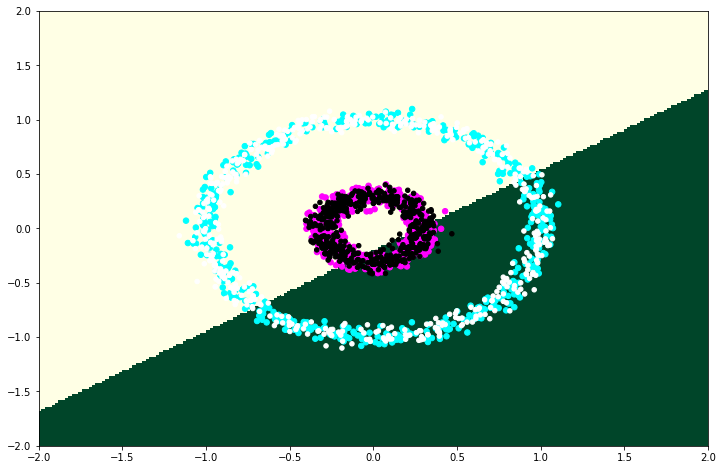

/home/fco/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


identity :  0.507
lbfgs :  0.541
0.0001 :  0.541


In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=1)
clf.fit(x_train, y_train)
print('Default: ', clf.score(x_test, y_test))

plot_classifier(clf, x_train, y_train, x_test, y_test, 'tree')

activ = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
alpha = [0.0001, 0.001, 0.01, 0.1, 1]


mejor = ''
mejor_sc = 0
for i in range(len(activ)):
    clf = MLPClassifier(hidden_layer_sizes=(), activation=activ[i], random_state=1)
    clf.fit(x_train, y_train)
    sc = clf.score(x_test, y_test)
    if(sc>mejor_sc):
        mejor_sc = sc
        mejor = activ[i]
print(mejor, ': ', mejor_sc)

mejor = ''
mejor_sc = 0
for i in range(len(solver)):
    clf = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver=solver[i], random_state=1)
    clf.fit(x_train, y_train)
    sc = clf.score(x_test, y_test)
    if(sc>mejor_sc):
        mejor_sc = sc
        mejor = solver[i]
print(mejor, ': ', mejor_sc)

mejor = ''
mejor_sc = 0
for i in range(len(solver)):
    clf = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver=solver[i], alpha=alpha[i], random_state=1)
    clf.fit(x_train, y_train)
    sc = clf.score(x_test, y_test)
    if(sc>mejor_sc):
        mejor_sc = sc
        mejor = alpha[i]
print(mejor, ': ', mejor_sc)

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b> 
Como se explico anteriormente el problema es linealmente inseparable, para una red neuronal sin capas ocultas es imposible resolver uno como tal. Para dejar constancia de ello se varian parámetros de la máquina que corresponden a: solver y alpha (regularización). Se sigue una estrategia greedy en que se selecciona el mejor para cada nueva instancia, aún así con los mejores parámetros no es posible resolver el problema.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta c</b>
</p>

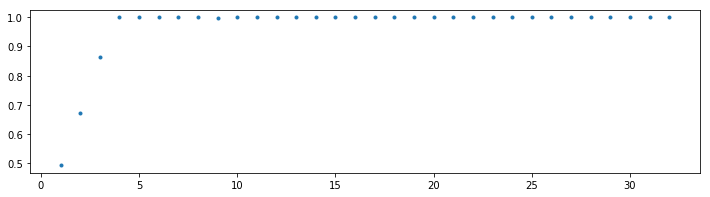

2 neurona en capa oculta


/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


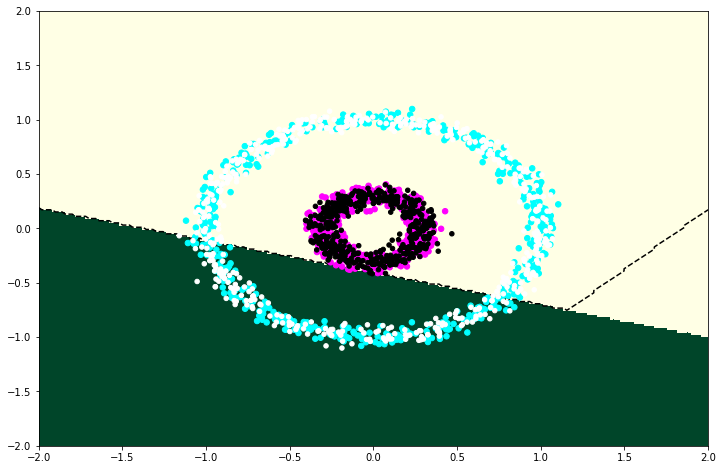

4 neurona en capa oculta


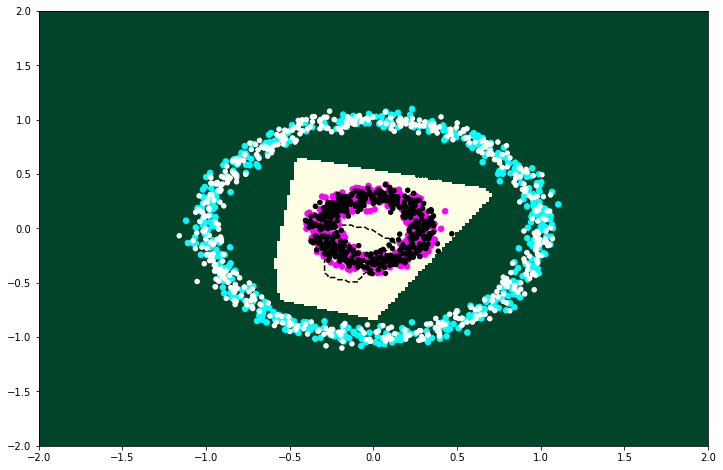

32 neurona en capa oculta


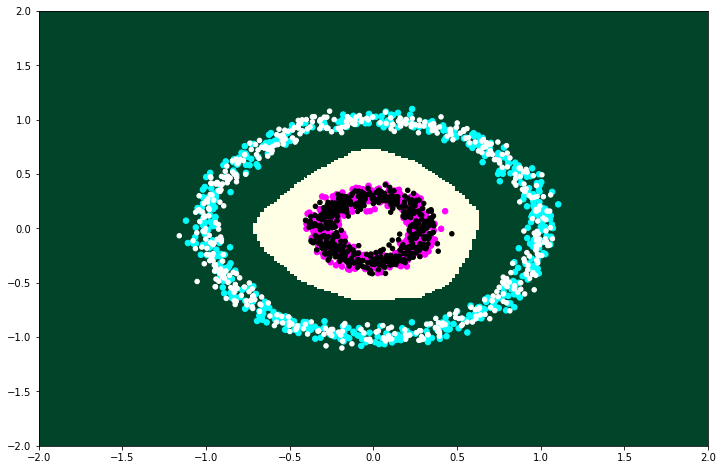

100 neurona en capa oculta


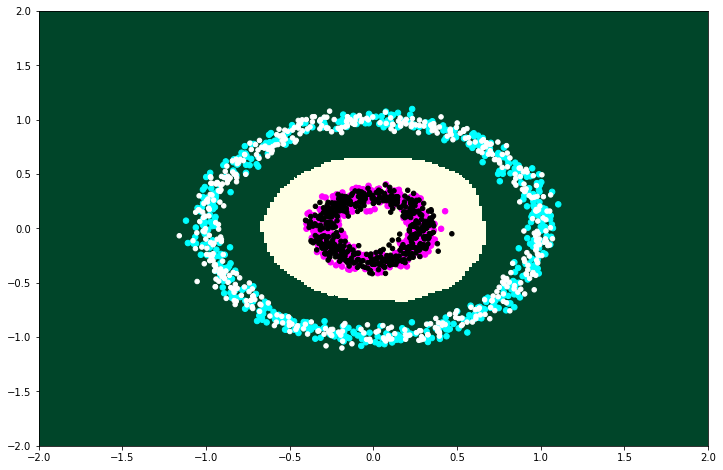

In [6]:
maxi = 33
acc_test = list()
xs = list(range(1, maxi))

for i in range(1, maxi):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i), random_state=1)
    clf.fit(x_train, y_train)
    acc_test.append(clf.score(x_test, y_test))

fig = plt.figure(figsize = (12,3))
plt.plot(xs, acc_test, '.')
plt.show()

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2), random_state=1)
clf.fit(x_train, y_train)
print('2 neurona en capa oculta')
plot_classifier(clf, x_train, y_train, x_test, y_test, 'tree')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4), random_state=1)
clf.fit(x_train, y_train)
print('4 neurona en capa oculta')
plot_classifier(clf, x_train, y_train, x_test, y_test, 'tree')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32), random_state=1)
clf.fit(x_train, y_train)
print('32 neurona en capa oculta')
plot_classifier(clf, x_train, y_train, x_test, y_test, 'tree')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)
clf.fit(x_train, y_train)
print('100 neurona en capa oculta')
plot_classifier(clf, x_train, y_train, x_test, y_test, 'tree')

<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> 
Se trabaja con solo una capa oculta y se varía la cantidad de neuronas en ella, se nota que a partir de 4 neuronas la accuracy entregada para el test de pruebas es de un 100%, a pesar de esto en cuanto más se aumenta el número de neuronas se logra una mejor frontera que se ajusta mejor a los datos del set.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta d</b>
</p>

Test Accuracy = 0.670000
Test Accuracy = 0.658000
Test Accuracy = 0.679000


/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


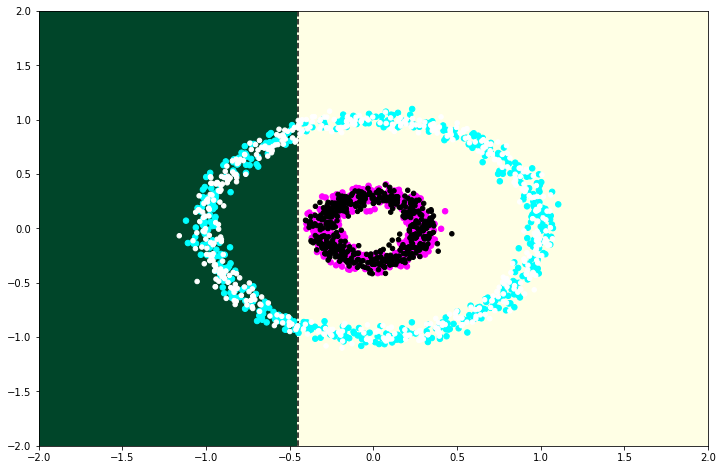

In [7]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(x_train,y_train)
acc_test = clf.score(x_test,y_test)
print("Test Accuracy = %f" % acc_test)

clf=Tree(criterion='entropy',splitter='best',random_state=0,max_depth=1)
clf.fit(x_train,y_train)
acc_test = clf.score(x_test,y_test)
print("Test Accuracy = %f" % acc_test)

clf=Tree(criterion='gini',splitter='random',random_state=0,max_depth=1)
clf.fit(x_train,y_train)
acc_test = clf.score(x_test,y_test)
print("Test Accuracy = %f" % acc_test)
plot_classifier(clf,x_train,y_train,x_test,y_test,'tree')

<p style="font-size: 18px; line-height: 135%;}">
<b>d)</b> 
Al igual que con una red neuronal sin capas ocultas, para un árbol con profundidad máxima de 1 es imposible resolver este problema linealmente inseparable. En el caso de los árboles es más intuitivo el hecho de pensar que un árbol que solo es capaz de tomar una decisión no podrá resolver el problema ya que solo podrá crear una frontera que se desprende de esa decisión siendo esta una línea. Se sigue la misma estrategia que con la red neuronal y no se encuentra una combinación de parámetros satisfactoria para resolver de buena forma el problema.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta e</b>
</p>

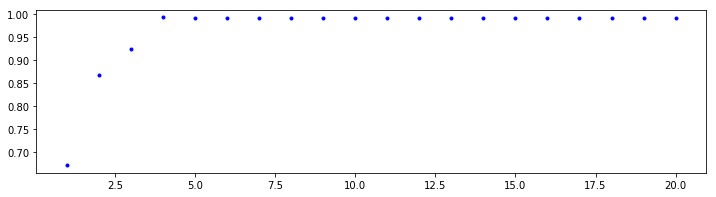

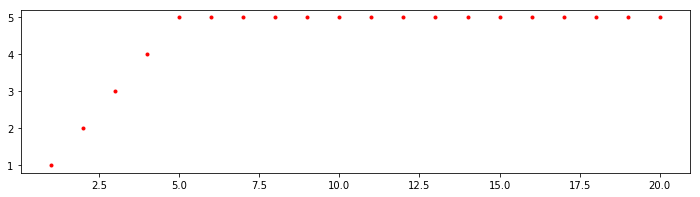

/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


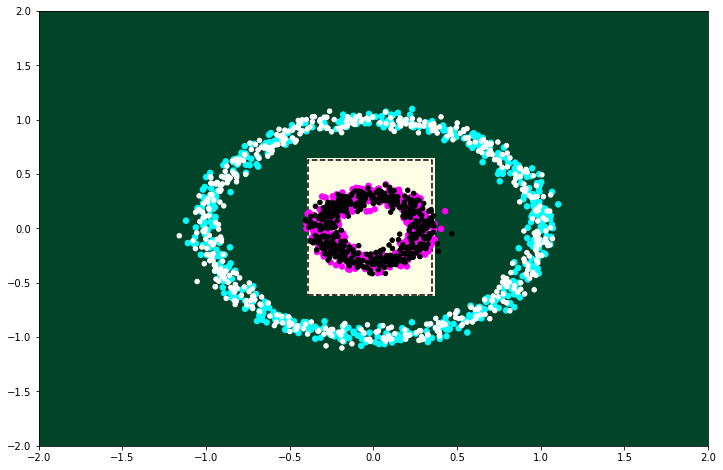

In [8]:
from sklearn.tree import DecisionTreeClassifier as Tree

maxi = list(range(1, 21))
acc_test = list()
max_depth = list()

for i in range(1, 21):
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=i)
    clf.fit(x_train,y_train)
    acc_test.append(clf.score(x_test,y_test))
    max_depth.append(clf.tree_.max_depth)
    
plt.figure(figsize=(12,3))
plt.plot(maxi, acc_test, '.', color='b')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(maxi, max_depth, '.', color='r')
plt.show()

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=4)
clf.fit(x_train,y_train)
plot_classifier(clf,x_train,y_train,x_test,y_test,'tree')

<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> 
A medida que se aumenta la profundida máxima y se le permite mayor nivel de decisión la máquina basada en árboles es capaz de definir una mejor frontera que permite satisfactoriamente resolver el problema, notar que para profundidades mayores a 5 la solución no cambia y es que el algoritmo internamente límita la profundidad.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta f</b>
</p>

In [9]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=3)
kpca = kpca.fit(x_train)
xkpca_train = kpca.transform(x_train)
xkpca_test = kpca.transform(x_test)

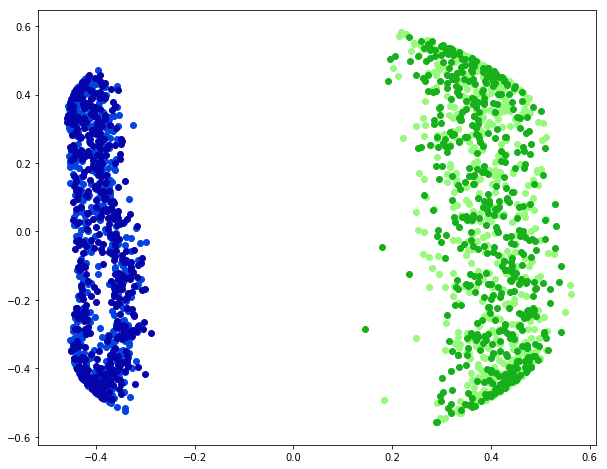

In [10]:
mske = y_train.astype(np.bool)
clase0e = xkpca_train[~mske]
clase1e = xkpca_train[mske]
x0e, y0e = clase0e.T
x1e, y1e = clase1e.T

mskp = y_test.astype(np.bool)
clase0p = xkpca_test[~mskp]
clase1p = xkpca_test[mskp]
x0p, y0p = clase0p.T
x1p, y1p = clase1p.T

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax.scatter(x0e, y0e, color='xkcd:blue')
ax.scatter(x1e, y1e, color='xkcd:light green')
ax.scatter(x0p, y0p, color='xkcd:royal blue')
ax.scatter(x1p, y1p, color='xkcd:green')

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b> 
Al aplicar PCA y redefinir las dimensiones (se pasa de 2D a 2D), se tiene que el método kernelizado ayuda de buena manera a separar los datos definiendolos en este nuevo espacio de forma tal y que trivialmente se puede observar en el gráfico que ahora el proble si es linealmente separable.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta g</b>
</p>

Acc con kpca y 0 capas ocultas:  1.0


/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


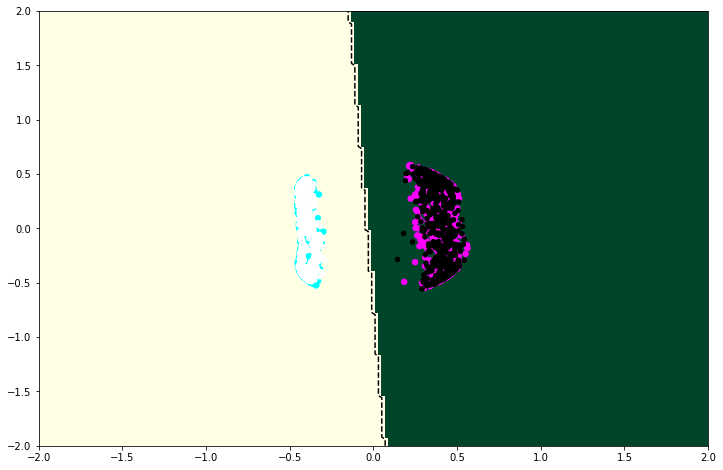

In [11]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=1)
clf.fit(xkpca_train, y_train)
print('Acc con kpca y 0 capas ocultas: ', clf.score(xkpca_test, y_test))

plot_classifier(clf, xkpca_train, y_train, xkpca_test, y_test, 'ann')

Acc con profundidad 1 y kpca:  1.0


/home/fco/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


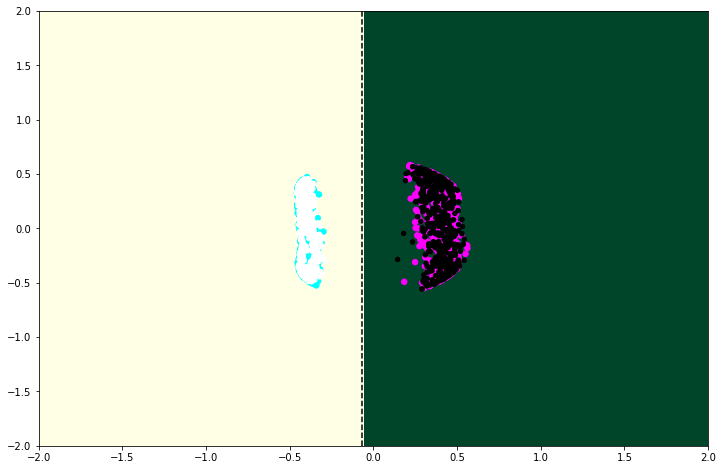

In [12]:
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(xkpca_train, y_train)
print('Acc con profundidad 1 y kpca: ', clf.score(xkpca_test, y_test))

plot_classifier(clf, xkpca_train, y_train, xkpca_test, y_test, 'ann')

<p style="font-size: 18px; line-height: 135%;}">
<b>g)</b> 
Con la nueva definición del espacio una máquina basada en redes neuronales sin capaz ocultas y un árbol cons tan solo profundidad de 1 son capaces de resolver el problema ya que ahora si es linealmente separable.
</p>